In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

%matplotlib inline
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
import matplotlib.cm as cm
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
from matplotlib import dates


#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('최종데이터/전체데이터_독립+종속_1720.csv')
df

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,천명당_공원수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5
0,마산동부경찰서,0,0,0,5,5,0,0,30,185,...,0.320412,0.703934,3.562987,61.155591,6.313743,74.6,77.0,64.0,65.7,71.2
1,마산동부경찰서,1,0,0,6,5,0,0,36,185,...,0.324557,0.703934,3.573817,61.155591,7.472527,71.7,73.5,64.9,63.6,70.3
2,마산동부경찰서,2,0,0,5,4,0,0,34,185,...,0.328809,0.703934,3.584647,61.155591,9.313584,76.0,79.0,67.5,70.0,72.6
3,마산동부경찰서,3,0,0,6,6,0,0,31,185,...,0.333224,0.703934,3.584647,61.155591,9.941709,72.4,75.6,67.9,70.7,71.8
4,마산동부경찰서,4,0,0,7,6,0,0,36,185,...,0.337757,0.703934,3.595477,61.155591,11.609491,76.1,78.2,66.4,69.9,72.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,창원중부경찰서,2,1,0,8,6,1,0,56,201,...,0.386518,1.416245,5.748288,30.147271,9.309727,78.0,80.1,65.3,68.6,72.9
283,창원중부경찰서,3,1,0,6,6,1,0,58,201,...,0.388677,1.416245,5.789942,30.147271,10.205294,75.7,77.7,67.8,70.6,74.2
284,창원중부경찰서,4,0,0,8,7,0,0,52,201,...,0.390861,1.416245,5.800356,30.147271,13.308536,80.8,82.8,69.4,73.8,76.1
285,창원중부경찰서,5,0,0,7,11,0,0,56,201,...,0.392087,1.416245,5.852424,30.147271,14.349893,77.6,79.6,70.9,73.6,74.1


In [417]:
df = df[['police','year','천명당_범죄발생_절도폭력','천명당_범죄발생_강간추행','경찰서 수/면적','면적당_cctv수','면적당_보안등수','면적당_유흥업소수','남성비율','1인_남성비율','외국인_전체비율','외국인_남성비율','기초생활수급_비율','rob_safety_q1']]

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   police         287 non-null    object 
 1   year           287 non-null    int64  
 2   천명당_범죄발생_절도폭력  287 non-null    float64
 3   천명당_범죄발생_강간추행  287 non-null    float64
 4   경찰서 수/면적       287 non-null    float64
 5   면적당_cctv수      287 non-null    float64
 6   면적당_보안등수       287 non-null    float64
 7   면적당_유흥업소수      287 non-null    float64
 8   남성비율           287 non-null    float64
 9   1인_남성비율        287 non-null    float64
 10  외국인_전체비율       287 non-null    float64
 11  외국인_남성비율       287 non-null    float64
 12  기초생활수급_비율      287 non-null    float64
 13  rob_safety_q1  246 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 31.5+ KB


In [419]:
df_p = df.loc[df['year']== 6]

In [420]:
df2 = df.loc[df['year'].isin([0,1,2,3,4,5])]

In [421]:
df2

,police,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율,rob_safety_q1
0,마산동부경찰서,0,0.749270,0.024647,0.075808,6.313743,61.155591,3.562987,0.502356,0.486883,0.013654,0.590253,0.023321,74.6
1,마산동부경찰서,1,0.868814,0.029959,0.075808,7.472527,61.155591,3.573817,0.502130,0.486057,0.013831,0.586282,0.023653,71.7
2,마산동부경찰서,2,0.743615,0.025293,0.075808,9.313584,61.155591,3.584647,0.501900,0.485276,0.014012,0.582671,0.023684,76.0
3,마산동부경찰서,3,0.917648,0.030759,0.075808,9.941709,61.155591,3.584647,0.501292,0.480842,0.014457,0.571631,0.025371,72.4
4,마산동부경찰서,4,0.852187,0.036374,0.075808,11.609491,61.155591,3.595477,0.500665,0.476514,0.014918,0.561129,0.028340,76.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,창원중부경찰서,1,0.551243,0.031256,0.062481,8.539123,30.147271,5.717047,0.517705,0.541299,0.021297,0.684990,0.020186,76.8
282,창원중부경찰서,2,0.542831,0.022736,0.062481,9.309727,30.147271,5.748288,0.517443,0.539119,0.021705,0.675265,0.019960,78.0
283,창원중부경찰서,3,0.577300,0.017148,0.062481,10.205294,30.147271,5.789942,0.517118,0.536059,0.021975,0.668878,0.021211,75.7
284,창원중부경찰서,4,0.586291,0.022992,0.062481,13.308536,30.147271,5.800356,0.516796,0.533222,0.022245,0.662661,0.023512,80.8


In [422]:
df2 = df2.iloc[:,1:]

# 데이터분석
- StandardScaler 로 데이터 전처리
- 히트맵을 통해 상관분석
- 75:25 비율로 train:test 데이터 나눠서 모델 진행
- vif를 줄이는 쪽으로 변수 제거
- 선형회귀, 릿지, 라쏘, rf, xgboost, lightgbm 진행

## 히트맵을 통한 상관분석

In [423]:
# StandardScaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [424]:
scaler = StandardScaler()
scaler.fit(df2.iloc[:,:-1])
df2_scaled = scaler.transform(df2.iloc[:,:-1])
df2_scaled = pd.DataFrame(df2_scaled, index=df2.index, columns=df2.columns[:-1])
df2_scaled

,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
0,-1.46385,-0.399732,-0.769165,-0.849208,-1.326108,-1.199226,-0.501474,0.961697,0.137979,-0.830226,1.330305,-0.334887
1,-0.87831,-0.210432,-0.648213,-0.849208,-1.311719,-1.199226,-0.499973,0.941864,0.117104,-0.824727,1.274584,-0.297609
2,-0.29277,-0.408688,-0.754457,-0.849208,-1.288857,-1.199226,-0.498472,0.921732,0.097387,-0.819085,1.223929,-0.294049
3,0.29277,-0.133103,-0.629997,-0.849208,-1.281057,-1.199226,-0.498472,0.868567,-0.014589,-0.805249,1.069018,-0.104465
4,0.87831,-0.236761,-0.502155,-0.849208,-1.260347,-1.199226,-0.496971,0.813727,-0.123880,-0.790877,0.921650,0.229262
...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.87831,-0.713312,-0.618683,-0.882338,-1.298474,-1.351504,-0.202891,2.304677,1.512135,-0.592315,2.659605,-0.687279
282,-0.29277,-0.726633,-0.812669,-0.882338,-1.288905,-1.351504,-0.198560,2.281748,1.457081,-0.579614,2.523152,-0.712682
283,0.29277,-0.672051,-0.939924,-0.882338,-1.277784,-1.351504,-0.192786,2.253262,1.379817,-0.571215,2.433525,-0.571990
284,0.87831,-0.657813,-0.806853,-0.882338,-1.239248,-1.351504,-0.191343,2.225089,1.308168,-0.562808,2.346304,-0.313424


In [425]:
df2_scaled.columns

Index(['year', '천명당_범죄발생_절도폭력', '천명당_범죄발생_강간추행', '경찰서 수/면적', '면적당_cctv수',
       '면적당_보안등수', '면적당_유흥업소수', '남성비율', '1인_남성비율', '외국인_전체비율', '외국인_남성비율',
       '기초생활수급_비율'],
      dtype='object')

In [426]:
# df2_scaled = df2_scaled[['112신고_폭력', '112신고_절도', '112신고_강도', '112신고_살인',
#        '범죄검거_강간/강제추행', '범죄검거_절도', '범죄검거_폭력', '범죄검거_강도', '범죄검거_살인', '범죄발생_절도',
#        '범죄발생_폭력', '범죄발생_강도', '범죄발생_살인', '범죄발생_강간/강제추행', '경찰서 수', '경찰 수', '면적',
#        '경찰서 수/면적', '경찰 수/면적', 'cctv수', '보안등수', '공원현황', '유흥업소수',
#        'popu_female_num', 'popu_male_num', 'popu_num', 
#        '1인가구합계_계', '1인가구합계_남자', '1인가구합계_여자', '외국인인구_계', '외국인인구_남자', '외국인인구_여자',
#        '기초생활수급자', 'rob_safety_q1', 'mur_safety_q2']]

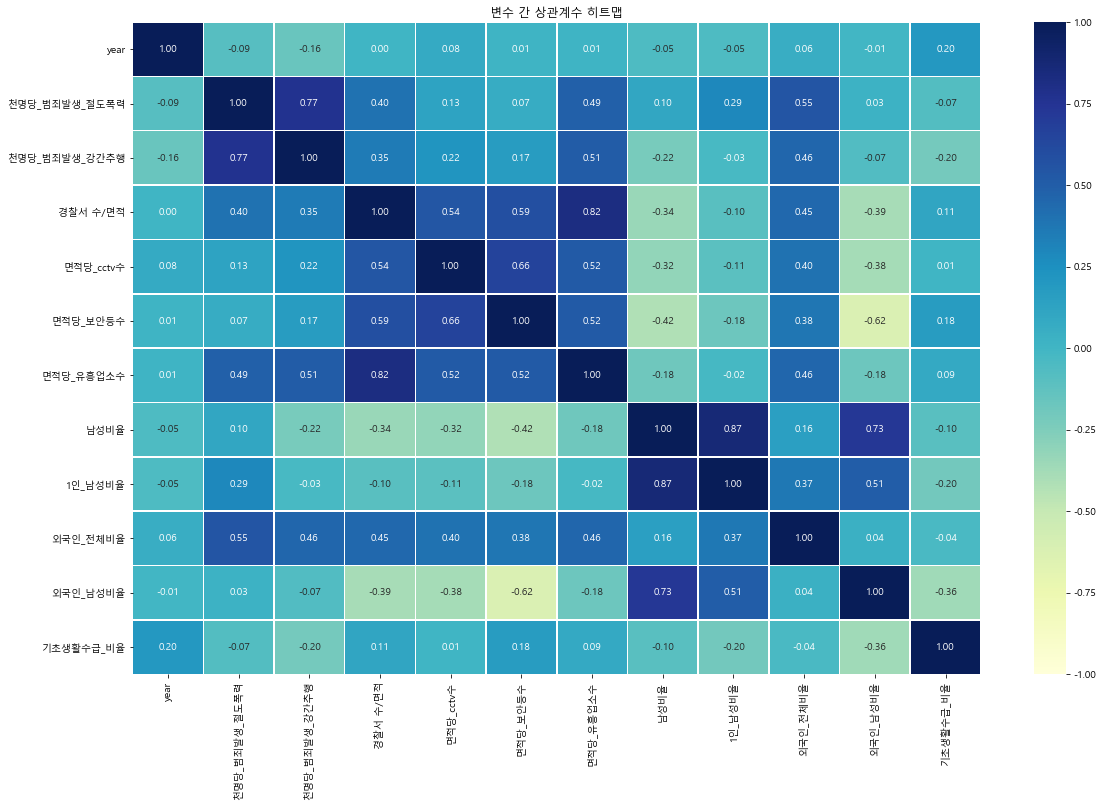

In [427]:
# 히트맵을 이용한 상관분석
plt.figure(figsize=(19,12))
sns.heatmap(data=df2_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='YlGnBu', vmin = -1, vmax=1)
plt.title('변수 간 상관계수 히트맵')
plt.show()

- 상관관계가 높은 변수들이 관찰됨 (112끼리, 범죄끼리, 인구끼리)

## 회귀 분석

In [428]:
# 통계 및 회귀 분석
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [429]:
# 정답 제거
# df2_scaled_data = df2_scaled.loc[:,[ '범죄발생_절도','범죄발생_폭력','범죄발생_강간/강제추행','경찰서 수/면적','경찰 수/면적','유흥업소수','보안등수','1인가구합계_여자', '외국인인구_계', '기초생활수급자']]
df2_scaled_data = df2_scaled
df2_scaled_data

,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
0,-1.46385,-0.399732,-0.769165,-0.849208,-1.326108,-1.199226,-0.501474,0.961697,0.137979,-0.830226,1.330305,-0.334887
1,-0.87831,-0.210432,-0.648213,-0.849208,-1.311719,-1.199226,-0.499973,0.941864,0.117104,-0.824727,1.274584,-0.297609
2,-0.29277,-0.408688,-0.754457,-0.849208,-1.288857,-1.199226,-0.498472,0.921732,0.097387,-0.819085,1.223929,-0.294049
3,0.29277,-0.133103,-0.629997,-0.849208,-1.281057,-1.199226,-0.498472,0.868567,-0.014589,-0.805249,1.069018,-0.104465
4,0.87831,-0.236761,-0.502155,-0.849208,-1.260347,-1.199226,-0.496971,0.813727,-0.123880,-0.790877,0.921650,0.229262
...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.87831,-0.713312,-0.618683,-0.882338,-1.298474,-1.351504,-0.202891,2.304677,1.512135,-0.592315,2.659605,-0.687279
282,-0.29277,-0.726633,-0.812669,-0.882338,-1.288905,-1.351504,-0.198560,2.281748,1.457081,-0.579614,2.523152,-0.712682
283,0.29277,-0.672051,-0.939924,-0.882338,-1.277784,-1.351504,-0.192786,2.253262,1.379817,-0.571215,2.433525,-0.571990
284,0.87831,-0.657813,-0.806853,-0.882338,-1.239248,-1.351504,-0.191343,2.225089,1.308168,-0.562808,2.346304,-0.313424


In [430]:
# 학습용, 테스트용 데이터 자르기
X_train, X_test, y_train, y_test = train_test_split(df2_scaled_data, df2['rob_safety_q1'], test_size=0.25, random_state=1)
display(X_train)
display(y_train)

,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
115,0.29277,-1.026262,-0.883053,0.037878,1.895551,0.216655,-0.635529,-1.067359,-1.046484,-0.679047,0.378510,-1.600319
277,0.87831,0.121016,-0.618821,-0.961847,-1.348335,-1.347835,-0.762141,1.665364,1.412583,-0.635116,1.274485,-0.561513
54,1.46385,-0.501319,-0.298980,0.097358,2.043750,0.548002,-0.406781,-0.716855,-0.136574,0.547296,-0.685562,0.059818
227,0.29277,1.105812,0.997963,2.777922,0.408521,2.510394,2.727821,-0.487013,0.256064,1.252792,-0.633970,-0.309743
46,0.87831,-0.354519,0.104410,-0.280982,0.621853,0.473895,0.242268,0.784477,1.031416,0.298829,-0.378289,0.279711
...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.46385,-0.741871,-0.811525,-0.149875,-0.303106,-0.093979,0.066690,-0.723576,-0.832982,-0.754535,-0.203078,-0.749574
84,-1.46385,-0.814897,-0.782670,-0.077627,-0.751119,0.002713,-0.560420,-0.388607,-0.937432,-1.009221,-1.299720,0.548404
163,-0.29277,-0.251571,-0.164568,-0.445824,0.126379,-0.908938,-0.395849,-1.023838,-1.400812,-0.714966,0.406198,-0.624976
274,-0.87831,0.115517,-0.242847,-0.961847,-1.367649,-1.347835,-0.764255,1.733432,1.421277,-0.641466,1.601893,-0.837383


115    82.1
277    78.0
54     77.6
227    70.6
46     74.5
       ... 
159    83.1
84     77.7
163    81.6
274    76.1
43     70.9
Name: rob_safety_q1, Length: 184, dtype: float64

In [431]:
linear_model = sm.OLS(y_train, sm.add_constant(X_train))
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:          rob_safety_q1   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     20.51
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           2.63e-27
Time:                        22:54:40   Log-Likelihood:                -417.14
No. Observations:                 184   AIC:                             860.3
Df Residuals:                     171   BIC:                             902.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            77.0606      0.181    425.167

In [432]:
# 각 변수들의 p-value 데이터 프레임을 생성
df_pvalue = pd.DataFrame(linear_result.summary2().tables[1]['P>|t|'].round(2))
df_pvalue.drop('const',axis=0, inplace=True)
# 각 변수들의 VIF 데이터프레임 생성VIF 데이터프레임 생성
vif_xtrain = pd.DataFrame()
vif_xtrain["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_xtrain.index  = X_train.columns
vif_xtrain["VIF_Factor"]= round(vif_xtrain["VIF_Factor"],2)
# 두 데이터프레임 합치기
df_visual1 = df_pvalue.join(vif_xtrain, how='left')
df_visual1

,P>|t|,VIF_Factor
year,0.00,1.45
천명당_범죄발생_절도폭력,0.06,4.73
천명당_범죄발생_강간추행,0.00,5.78
경찰서 수/면적,0.00,5.92
면적당_cctv수,0.25,2.04
면적당_보안등수,0.02,3.49
면적당_유흥업소수,0.04,6.01
남성비율,0.00,18.54
1인_남성비율,0.67,10.85
외국인_전체비율,0.00,2.82


In [433]:
# 다중공선성이 높은변수들이 제거된 후 사용할 변수 리턴 함수
def feature_engineering_VIF(X_train, num) :
    '''
    X_train : 들어가는 df
    num : 상위 몇개 까지 쓸 것 인지의 파라미터
    '''
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor',ascending=True)['Feature'][:num].values
    return X_colname_vif

In [434]:
[variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]

[1.4459318616233185,
 4.726975704262325,
 5.778575876105766,
 5.918150518958983,
 2.04462895056262,
 3.493586949001602,
 6.0110442709931755,
 18.537061609325978,
 10.84623542607868,
 2.8157797666808726,
 5.531068502568129,
 1.9447995421213156]

In [435]:
feature_engineering_VIF(X_train,10)

array(['year', '기초생활수급_비율', '면적당_cctv수', '외국인_전체비율', '면적당_보안등수',
       '천명당_범죄발생_절도폭력', '외국인_남성비율', '천명당_범죄발생_강간추행', '경찰서 수/면적',
       '면적당_유흥업소수'], dtype=object)

In [436]:
# 위의 변수 선택법으로 선택된 변수들로 새로운 데이터 생성
X_train2 = X_train[['year', '면적당_cctv수', '기초생활수급_비율', '면적당_보안등수', '외국인_전체비율',
       '외국인_남성비율', '천명당_범죄발생_절도폭력', '면적당_유흥업소수', '천명당_범죄발생_강간추행',
       '경찰서 수/면적']]
X_train2

,year,면적당_cctv수,기초생활수급_비율,면적당_보안등수,외국인_전체비율,외국인_남성비율,천명당_범죄발생_절도폭력,면적당_유흥업소수,천명당_범죄발생_강간추행,경찰서 수/면적
115,0.29277,1.895551,-1.600319,0.216655,-0.679047,0.378510,-1.026262,-0.635529,-0.883053,0.037878
277,0.87831,-1.348335,-0.561513,-1.347835,-0.635116,1.274485,0.121016,-0.762141,-0.618821,-0.961847
54,1.46385,2.043750,0.059818,0.548002,0.547296,-0.685562,-0.501319,-0.406781,-0.298980,0.097358
227,0.29277,0.408521,-0.309743,2.510394,1.252792,-0.633970,1.105812,2.727821,0.997963,2.777922
46,0.87831,0.621853,0.279711,0.473895,0.298829,-0.378289,-0.354519,0.242268,0.104410,-0.280982
...,...,...,...,...,...,...,...,...,...,...
159,1.46385,-0.303106,-0.749574,-0.093979,-0.754535,-0.203078,-0.741871,0.066690,-0.811525,-0.149875
84,-1.46385,-0.751119,0.548404,0.002713,-1.009221,-1.299720,-0.814897,-0.560420,-0.782670,-0.077627
163,-0.29277,0.126379,-0.624976,-0.908938,-0.714966,0.406198,-0.251571,-0.395849,-0.164568,-0.445824
274,-0.87831,-1.367649,-0.837383,-1.347835,-0.641466,1.601893,0.115517,-0.764255,-0.242847,-0.961847


In [437]:
# 최종선택된 변수들의 다중공선성 확인 -> 모두 10보다 작으므로 해결되었다
vif_xtrain2 = pd.DataFrame()
vif_xtrain2["VIF_Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_xtrain2.index  = X_train2.columns
vif_xtrain2["VIF_Factor"]= round(vif_xtrain2["VIF_Factor"],2)
vif_xtrain2

,VIF_Factor
year,1.23
면적당_cctv수,2.01
기초생활수급_비율,1.39
면적당_보안등수,3.42
외국인_전체비율,2.47
외국인_남성비율,2.90
천명당_범죄발생_절도폭력,3.73
면적당_유흥업소수,5.57
천명당_범죄발생_강간추행,4.04
경찰서 수/면적,4.88


In [438]:
# 선형 회귀를 위해 선택된 변수들로 test데이터 재생성
X_test2 = X_test[['year', '면적당_cctv수', '기초생활수급_비율', '면적당_보안등수', '외국인_전체비율',
       '외국인_남성비율', '천명당_범죄발생_절도폭력', '면적당_유흥업소수', '천명당_범죄발생_강간추행',
       '경찰서 수/면적']]
X_test2

,year,면적당_cctv수,기초생활수급_비율,면적당_보안등수,외국인_전체비율,외국인_남성비율,천명당_범죄발생_절도폭력,면적당_유흥업소수,천명당_범죄발생_강간추행,경찰서 수/면적
78,-0.87831,-0.854210,1.964886,-0.939270,-0.950289,-0.700238,-0.531118,-0.754919,-0.611949,-0.481266
285,1.46385,-1.226317,-0.175847,-1.351504,-0.596985,2.127039,-0.960774,-0.184126,-0.870855,-0.882338
242,0.87831,-0.276188,-1.506911,-1.065937,-0.195342,0.353203,0.334503,-0.273820,0.078087,-0.495978
259,-1.46385,-1.383975,0.728502,-1.457283,-0.758384,1.669158,-0.286078,-0.928585,-0.621256,-0.992410
105,-1.46385,-0.865818,-0.779098,-0.208149,-0.245854,-1.068206,0.131076,-0.425429,1.138916,-0.344697
...,...,...,...,...,...,...,...,...,...,...
32,0.87831,-0.476311,3.115825,0.247951,-0.707616,-1.471498,-0.017658,0.046021,-0.281331,-0.093351
18,0.87831,1.744593,-0.452982,0.530604,-0.660804,0.773870,0.540908,2.206509,1.620890,0.597165
284,0.87831,-1.239248,-0.313424,-1.351504,-0.562808,2.346304,-0.657813,-0.191343,-0.806853,-0.882338
270,0.87831,-1.301133,0.255310,-1.369681,-0.453402,2.034380,-0.665397,-0.657026,-0.853229,-0.915084


In [439]:
linear_model2 = sm.OLS(y_train, sm.add_constant(X_train2))
linear_result2 = linear_model2.fit()
print(linear_result2.summary())

                            OLS Regression Results                            
Dep. Variable:          rob_safety_q1   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     16.93
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           3.78e-21
Time:                        22:54:40   Log-Likelihood:                -436.38
No. Observations:                 184   AIC:                             894.8
Df Residuals:                     173   BIC:                             930.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            77.1422      0.199    387.320

In [440]:
# 평가 함수 생성
def MAE_func(test, pred):
    rms = mean_absolute_error(test, pred)
    return rms

## Linear Regression

In [441]:
lr_model = LinearRegression()
lr_model.fit(X_train2,y_train)
print(lr_model.score(X_train2, y_train))
print(lr_model.score(X_test2, y_test))

y_pred = lr_model.predict(X_test2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.49462582677885514
0.2807099773895053
2.782735934342163
1.6681534504781517


## Ridge & Lasso

In [442]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

In [443]:
# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        X_train, y_train).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        X_train, y_train).best_estimator_,}

In [444]:
# Lasso 모델의 파라미터 
linear_models['Lasso']

Lasso(alpha=0.01)

In [445]:
# 결정계수와 오차
print(linear_models['Lasso'].score(X_train,y_train))
print(linear_models['Lasso'].score(X_test,y_test))

y_pred = linear_models['Lasso'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5892812831546279
0.34958315888371494
2.6461585792151516
1.6267017486973916


In [446]:
linear_models['Ridge']

Ridge(alpha=10.0)

In [447]:
# 결정계수와 오차
print(linear_models['Ridge'].score(X_train,y_train))
print(linear_models['Ridge'].score(X_test,y_test))

y_pred = linear_models['Ridge'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5780715654334194
0.4004558218485168
2.540566535402687
1.5939154731047338


## Random Forest

In [450]:
# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [100,200],
    'max_depth': [4, 6, 8, 10, 12]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
RF_models = {
    'RF':GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [452]:
RF_models['RF']

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [453]:
# 결정계수와 오차
print(RF_models['RF'].score(X_train,y_train))
print(RF_models['RF'].score(X_test,y_test))

y_pred = RF_models['RF'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9066388481677647
0.5179947514860503
2.277958783091763
1.5092908212441243


## XGBoost

In [454]:
# parameter 범위를 정의한다.
XGB_params = {
    'n_estimators':[100,200],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
XGB_models = {
    'XGB':GridSearchCV(
    xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}
# XGB_models = {
#     'XGB':GridSearchCV(
#     xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).cv_results_
# }

In [455]:
XGB_models['XGB']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [456]:
# 결정계수와 오차
print(XGB_models['XGB'].score(X_train,y_train))
print(XGB_models['XGB'].score(X_test,y_test))

y_pred = XGB_models['XGB'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9999995366925796
0.38127334582258676
2.580889381805379
1.6065146690290066


## LightGBM

In [457]:
# parameter 범위를 정의한다.
LGBM_params = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01, 0.05, 0.1],
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
LGBM_models = {
    'LGBM':GridSearchCV(
    LGBMRegressor(random_state=42), param_grid=LGBM_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}


In [458]:
LGBM_models['LGBM']

LGBMRegressor(max_depth=5, n_estimators=200, random_state=42)

In [459]:
# 결정계수와 오차
print(LGBM_models['LGBM'].score(X_train,y_train))
print(LGBM_models['LGBM'].score(X_test,y_test))

y_pred = LGBM_models['LGBM'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9522698595743205
0.42445388931885153
2.489201418988753
1.5777203234378243


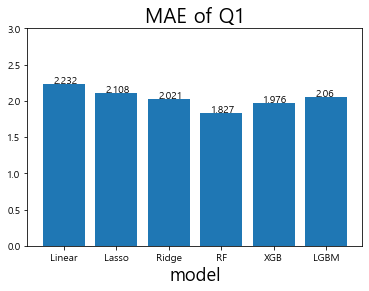

In [468]:
lr_pred = lr_model.predict(X_test2)
Lasso_pred = linear_models['Lasso'].predict(X_test)
Ridge_pred = linear_models['Ridge'].predict(X_test)
RF_pred = RF_models['RF'].predict(X_test)
XGB_pred = XGB_models['XGB'].predict(X_test)
LGBM_pred = LGBM_models['LGBM'].predict(X_test)

# test 데이터의 MSE 계산
mse_score = [MAE_func(y_test, lr_pred),
             MAE_func(y_test, Lasso_pred),
             MAE_func(y_test, Ridge_pred),
             MAE_func(y_test, RF_pred),
             MAE_func(y_test, XGB_pred),
             MAE_func(y_test, LGBM_pred)]

x_lab = ['Linear','Lasso','Ridge','RF','XGB','LGBM']

plt.bar(x_lab, mse_score)
plt.title('MAE of Q1', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('',fontsize=18)
plt.ylim(0.0, 3.0)

for i, v in enumerate(mse_score) :
    plt.text(i-0.2, v+0.01, str(np.round(v,3)))
    
plt.show()

In [461]:
df_p

,police,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율,rob_safety_q1
6,마산동부경찰서,6,0.658689,0.026138,0.075808,13.190634,61.155591,3.627966,0.501534,0.478467,0.014104,0.537064,0.032035,NaN
13,마산중부경찰서,6,0.409752,0.017073,0.034086,3.881541,29.062562,2.066463,0.497496,0.457956,0.016111,0.583539,0.034874,NaN
20,서울강남경찰서,6,0.942084,0.103852,0.657625,254.418700,413.399562,24.414331,0.478456,0.426766,0.017206,0.497090,0.023415,NaN
27,서울강동경찰서,6,0.554384,0.021741,0.383852,108.459510,319.876653,9.084497,0.491806,0.473348,0.014320,0.455746,0.025845,NaN
34,서울강북경찰서,6,0.837513,0.038954,0.379859,97.032775,355.843118,7.723792,0.487390,0.458750,0.016828,0.374614,0.057960,NaN
41,서울강서경찰서,6,0.548101,0.034472,0.261108,62.065265,223.847505,7.493787,0.482663,0.454185,0.015343,0.433610,0.042357,NaN
48,서울관악경찰서,6,0.672646,0.052519,0.304382,163.182612,401.851979,9.165282,0.501634,0.523589,0.048673,0.455345,0.033984,NaN
55,서울광진경찰서,6,0.698046,0.046152,0.456573,294.900488,416.942446,4.246129,0.482604,0.474631,0.057638,0.440146,0.029580,NaN
62,서울구로경찰서,6,0.806117,0.037091,0.397553,181.830895,387.813147,5.267580,0.493741,0.492143,0.112782,0.542228,0.025811,NaN
69,서울금천경찰서,6,0.858747,0.043153,0.386046,326.286058,483.329561,9.110685,0.505867,0.539684,0.117014,0.533855,0.044978,NaN


In [462]:
data_p = df_p.iloc[:,:-1]

In [463]:
data_p_scaled = scaler.transform(data_p.iloc[:,1:])
predict = RF_models['RF'].predict(data_p_scaled)
predict = list(predict)
predict

[75.84202752455025,
 78.98296894733758,
 81.29170797258308,
 78.90195728785974,
 73.29571236939233,
 77.14079702562236,
 73.15288437340821,
 77.30529922502794,
 72.64785282620964,
 70.04801309523826,
 77.11207784153056,
 78.96787359210934,
 77.23421673226697,
 73.91001962373977,
 76.9371171255468,
 79.62541280559729,
 83.0076517857144,
 78.92413018330679,
 78.19805638528148,
 83.05159345238111,
 78.04985617096955,
 78.06049360372184,
 80.23353906531707,
 82.67834535106712,
 78.68580295822979,
 72.90962271741425,
 79.89421419044888,
 78.75526733173601,
 79.14235484642283,
 75.0085343975281,
 72.96180749660955,
 76.98072220548428,
 75.0620542688308,
 78.53321942095461,
 77.80801409577563,
 72.6719477195811,
 75.6110914039162,
 78.44881926612166,
 77.37023834173046,
 76.48406389220538,
 77.29693546308192]

In [464]:
# result = data_p['경찰서명']
data_p['예측결과'] = predict
data_p

,police,year,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰서 수/면적,면적당_cctv수,면적당_보안등수,면적당_유흥업소수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율,예측결과
6,마산동부경찰서,6,0.658689,0.026138,0.075808,13.190634,61.155591,3.627966,0.501534,0.478467,0.014104,0.537064,0.032035,75.842028
13,마산중부경찰서,6,0.409752,0.017073,0.034086,3.881541,29.062562,2.066463,0.497496,0.457956,0.016111,0.583539,0.034874,78.982969
20,서울강남경찰서,6,0.942084,0.103852,0.657625,254.418700,413.399562,24.414331,0.478456,0.426766,0.017206,0.497090,0.023415,81.291708
27,서울강동경찰서,6,0.554384,0.021741,0.383852,108.459510,319.876653,9.084497,0.491806,0.473348,0.014320,0.455746,0.025845,78.901957
34,서울강북경찰서,6,0.837513,0.038954,0.379859,97.032775,355.843118,7.723792,0.487390,0.458750,0.016828,0.374614,0.057960,73.295712
41,서울강서경찰서,6,0.548101,0.034472,0.261108,62.065265,223.847505,7.493787,0.482663,0.454185,0.015343,0.433610,0.042357,77.140797
48,서울관악경찰서,6,0.672646,0.052519,0.304382,163.182612,401.851979,9.165282,0.501634,0.523589,0.048673,0.455345,0.033984,73.152884
55,서울광진경찰서,6,0.698046,0.046152,0.456573,294.900488,416.942446,4.246129,0.482604,0.474631,0.057638,0.440146,0.029580,77.305299
62,서울구로경찰서,6,0.806117,0.037091,0.397553,181.830895,387.813147,5.267580,0.493741,0.492143,0.112782,0.542228,0.025811,72.647853
69,서울금천경찰서,6,0.858747,0.043153,0.386046,326.286058,483.329561,9.110685,0.505867,0.539684,0.117014,0.533855,0.044978,70.048013


In [465]:
result_pred = data_p[['police','예측결과']]
result_pred.rename({'police':'경찰서명','예측결과':'문항1. 절도 폭력안전도(문항1 점수 * 10)'},axis=1,inplace=True)
result_pred

C:\Users\chldb\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,경찰서명,문항1. 절도 폭력안전도(문항1 점수 * 10)
6,마산동부경찰서,75.842028
13,마산중부경찰서,78.982969
20,서울강남경찰서,81.291708
27,서울강동경찰서,78.901957
34,서울강북경찰서,73.295712
41,서울강서경찰서,77.140797
48,서울관악경찰서,73.152884
55,서울광진경찰서,77.305299
62,서울구로경찰서,72.647853
69,서울금천경찰서,70.048013


In [467]:
# result_pred.to_csv('문항1예측결과_7.csv',index=False,encoding='utf-8-sig')

In [481]:
result_pred.sort_values(by = '문항1. 절도 폭력안전도(문항1 점수 * 10)', ascending=False)

,경찰서명,문항1. 절도 폭력안전도(문항1 점수 * 10)
139,서울서초경찰서,83.051593
118,서울방배경찰서,83.007652
167,서울수서경찰서,82.678345
20,서울강남경찰서,81.291708
160,서울송파경찰서,80.233539
188,서울용산경찰서,79.894214
111,서울마포경찰서,79.625413
202,서울종로경찰서,79.142355
13,마산중부경찰서,78.982969
83,서울노원경찰서,78.967874


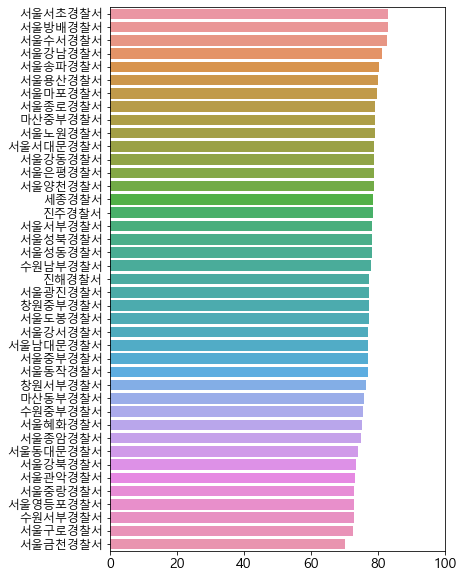

In [469]:
# 예측 시각화
plt.figure(figsize=(6,10))
sns.barplot(y='경찰서명',x='문항1. 절도 폭력안전도(문항1 점수 * 10)', data = result_pred.sort_values(by = '문항1. 절도 폭력안전도(문항1 점수 * 10)', ascending=False))
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,100)
plt.show()

# 변수별 중요도 시각화

In [470]:
# 독립변수 계수 상위 10개, 하위 10개 추출함수
def get_top_bottom_coef(model, features) :
    coef = pd.Series(model.coef_, index= features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(6)
    coef_low = coef.sort_values(ascending=False).tail(6)
    
    return coef_high, coef_low

In [471]:
# 계수를 시각화 - 모델별로 그림을 그린다. 
def visualize_coefficient(models, features=X_test2) :
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    pal = 'pastel'
    for idx, model in enumerate(models) :
        if model != lr_model :
            features = X_test
        coef_high, coef_low = get_top_bottom_coef(model, features)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axes[idx].set_title(model.__class__.__name__+' 변수중요도', size=25)
        axes[idx].tick_params(axis='y', direction='in', pad=-300)
        axes[idx].set_xlim(-8,8)
        for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()) :
            label.set_fontsize(22)
    
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axes[idx], palette=pal)

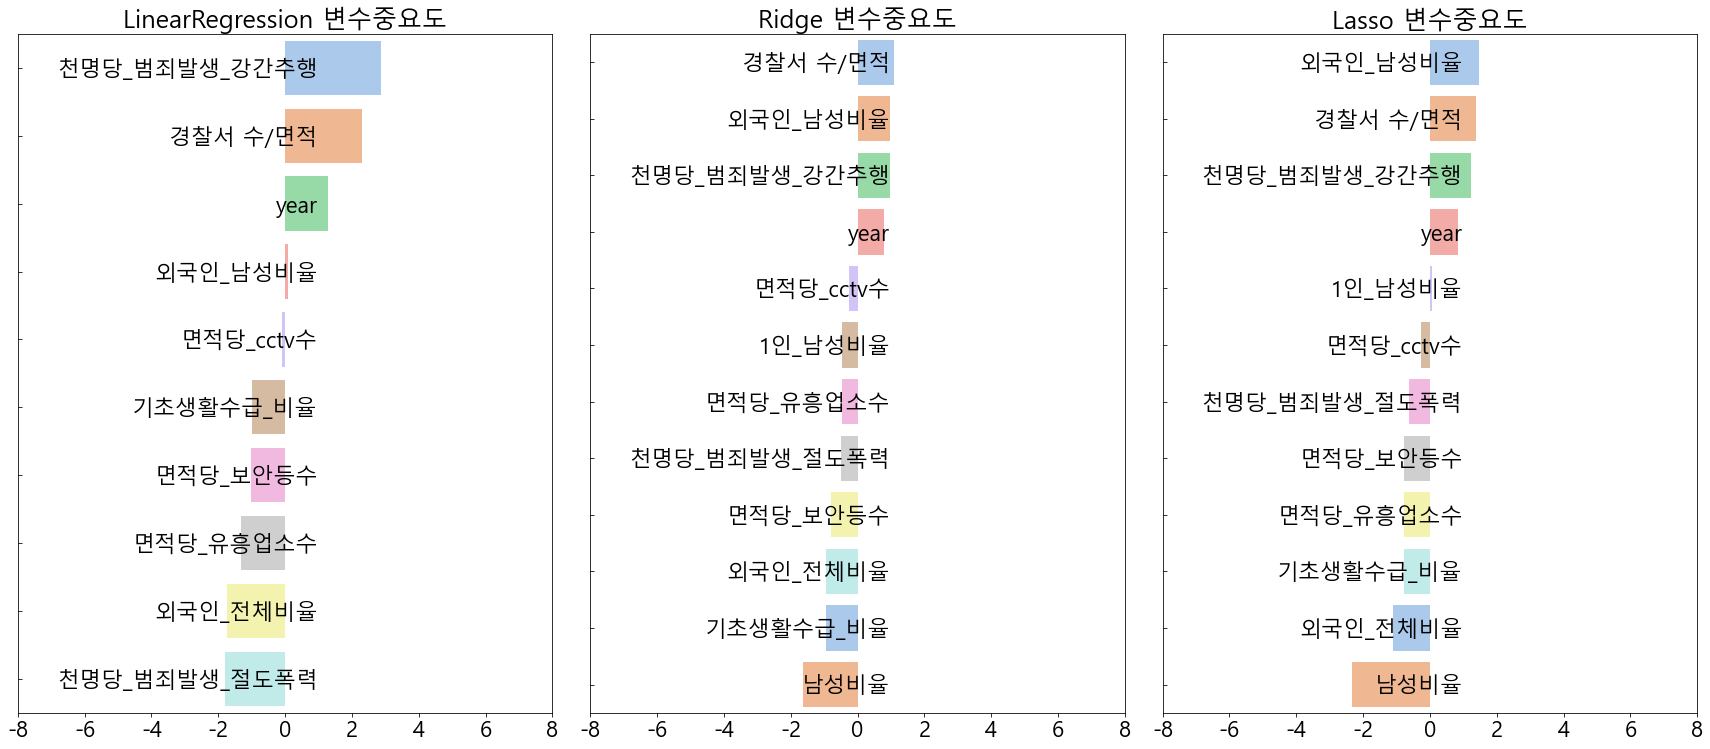

In [472]:
models = [lr_model, linear_models['Ridge'], linear_models['Lasso']]
visualize_coefficient(models, X_test2)

In [473]:
features = X_train.columns.values

In [474]:
x,y = (list(x) for x in zip(*sorted(zip(RF_models['RF'].feature_importances_, features), reverse=True)))

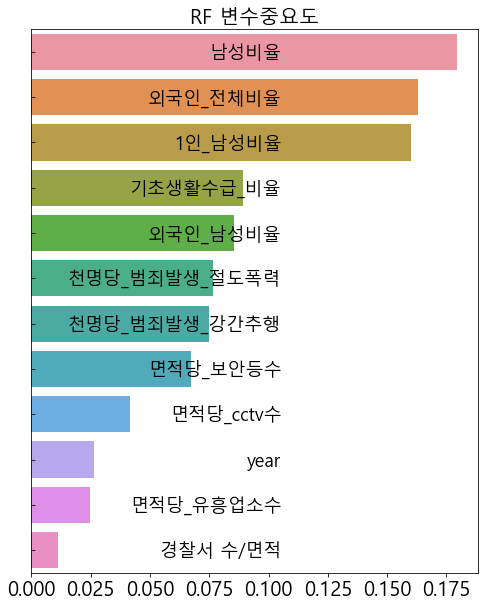

In [475]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('RF 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [476]:
x,y = (list(x) for x in zip(*sorted(zip(XGB_models['XGB'].feature_importances_, features), reverse=True)))

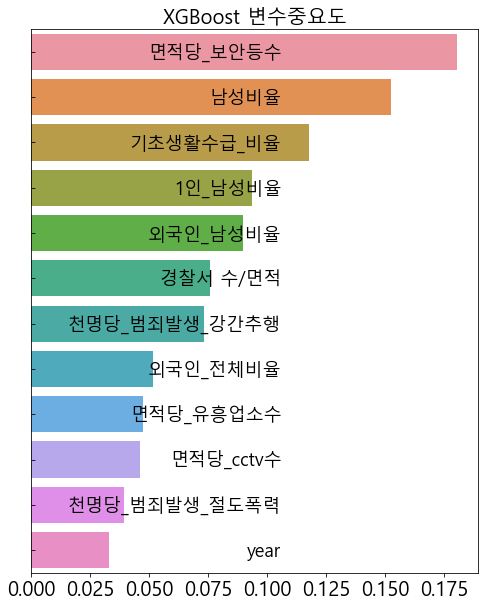

In [477]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('XGBoost 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [478]:
x,y = (list(x) for x in zip(*sorted(zip(LGBM_models['LGBM'].feature_importances_, features), reverse=True)))

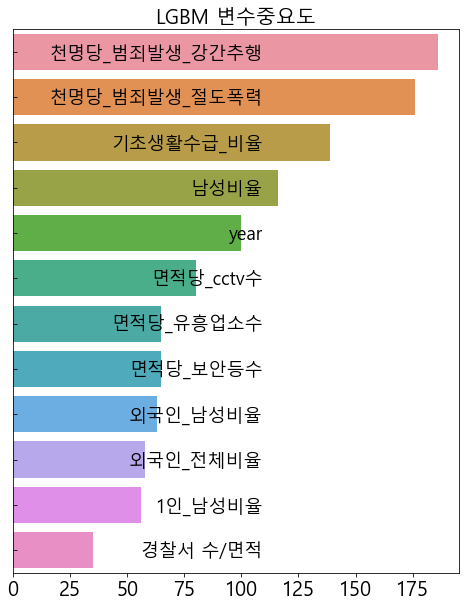

In [479]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('LGBM 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()